# Anomaly Detection 
##Credit Card Fraud Detection

So we are going to write the ***algorithm from Scratch*** for Credit Card Fraud Detection. We will use the technique of ***Anomaly Detection from the domain of Unsupervised Learning***.

### Getting Dataset
I found a good [Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) on Kaggle suitable for anomaly detection algorithm.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. 

This dataset presents transactions that occurred in two days, where they ha**492 frauds out of 284,807 transactions***. The dataset is highly unbalanced, ***the positive class (frauds) account for 0.172% of all transactions***.

For more info visit the [link](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [2]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 88% 58.0M/66.0M [00:01<00:00, 20.4MB/s]
100% 66.0M/66.0M [00:01<00:00, 35.7MB/s]


In [3]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

## Visualising Dataset

In [13]:
data_df = pd.read_csv('/content/creditcard.csv')
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Features with Gaussian Distribution
This algorithm works better if the features are gaussian distribution, so let us check it out by plotting them.

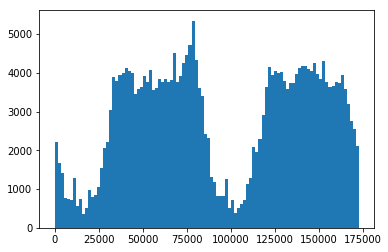

In [15]:
time = data_df['Time'].values
plt.hist(time,bins=100)
plt.show()

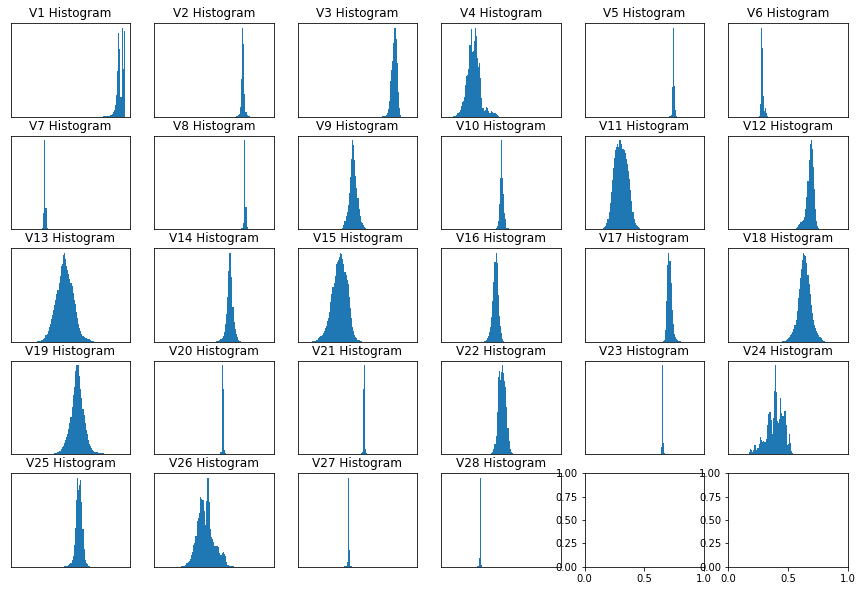

In [16]:
fig, ax = plt.subplots(nrows=5,ncols=6)
fig.set_figwidth(15)
fig.set_figheight(10)
#fig.subplots_adjust(wspace=0.6, hspace=0.6)
for i in range(1,29):
  V = data_df[f'V{i}']
  row , col = int((i-1)/6), (i-1)%6
  ax[row, col].hist(V, bins=100)
  ax[row, col].set_title(f'V{i} Histogram')
  ax[row, col].set_xticks([])
  ax[row, col].set_yticks([])
  
plt.show()

So we realise that most of them are gaussian curves, expect ***V1 which is a bit skewed***.

## Splitting Dataset into Train, Cross Validation and Test Dataset
So we have ***(284807 -  492 = )  284315 negative examples(non fraud), with class = 0***.
We will divide it into 
  - 60% for Training 
  - 20 % for Cross Validation
  - 20% for Testing

And the ***492 positive examples, with class = 1***.
  - 50% Cross Validation
  - 50% Testing
  
While Training, we will remove the labels and train the algorithm on the unlabeled data.

In [24]:
data = data_df.values[:,1:29]
class_ = data_df.values[:,30]

positive_examp = np.where(class_ == 1)[0]
pos_data = data[positive_examp,:]
pos_class = class_[positive_examp]

X_cv_pos, X_test_pos, y_cv_pos, y_test_pos = train_test_split( pos_data, 
                                                               pos_class, 
                                                               test_size=0.5)
                                                            #dividing into 50-50

negative_examp = np.where(class_ == 0)[0]
neg_data = data[negative_examp,:]
neg_class = class_[negative_examp]

X_train, X_cv_test_neg, y_train, y_cv_test_neg = train_test_split(neg_data, 
                                                                  neg_class, 
                                                                  test_size=0.4) 
                                                          #splitting into 60-40

X_cv_neg, X_test_neg, y_cv_neg, y_test_neg = train_test_split(X_cv_test_neg, 
                                                              y_cv_test_neg,
                                                              test_size=0.5)  
                                                  #splitting above 40 into 20-20
  

X_cv = np.vstack((X_cv_pos,X_cv_neg))
y_cv = np.hstack((y_cv_pos,y_cv_neg))

X_test = np.vstack((X_test_pos,X_test_neg))
y_test = np.hstack((y_test_pos,y_test_neg))

print(X_cv.shape,y_cv.shape, X_test.shape, y_test.shape)

(57109, 28) (57109,) (57109, 28) (57109,)


## Feature Scaling

## Algorithm
1. Choose features
2. Parameter Fitting and Deciding Epsilon

      The task of finding $\mu$ and $\sigma^{2}$
      and Deciding epsilon using the Cross Validation dataset.


3. Given new example, compute P(x) and predict whether it is an anomaly or not


In [25]:
m = X_train.shape[0]

mu = (1/m)*np.sum(X_train, axis=0)
sigma_2 = (1/m)*np.sum((X_train-mu)**2, axis=0)

print(mu.shape)
print(sigma_2.shape)

(28,)
(28,)


In [0]:
def gaussian_probability(X, mu, sigma_2):
  
  #sigma_2 corresponds to sigma square
  
  A = 1/((2*np.pi*sigma_2)**0.5)
  power = - ((X - mu)**2)/(2*sigma_2)
  Y = A*np.e**power
  y_probab = np.prod(Y, axis=1)
  
  return y_probab

def cal_F_score(y, y_pred):
 
  y = y.reshape(y.shape[0])
  
  tp = np.sum((y==1)&(y_pred==1))
  fp = np.sum((y==0)&(y_pred==1))
  tn = np.sum((y==1)&(y_pred==0))

  prec = tp/(tp+fp)
  recal = tp/(tp+tn)
  
  F_score = 2*prec*recal/(prec+recal)
  
  return F_score, prec, recal

def get_Prediction(epsilon, Y_probab):
  
  m = Y_probab.shape[0]
  y_pred = np.zeros(m)
  
  pos_indices = np.where(Y_probab < epsilon)[0]
  y_pred[pos_indices] = 1
  
  return y_pred

In [0]:
def decide_epsilon(X_cv, y_cv, mu, sigma_2):
  
  F_scores = []
  Y_probab = gaussian_probability(X_cv, mu, sigma_2)
  
  epsilons = np.linspace(start = np.min(Y_probab),
                         stop = np.max(Y_probab)*(10**(-100)),
                         num = 1000)
  
  epsilons = epsilons[1:]
  print('mean',np.mean(Y_probab))
  print('max',np.max(epsilons))
  print('min',np.min(epsilons))
  
  for eps in epsilons:
    
    y_pred = get_Prediction(eps, Y_probab)
    F_score = cal_F_score(y_cv, y_pred)[0]
    F_scores.append(F_score)
    
  F_scores = np.array(F_scores)
  best_eps = epsilons[np.argmax(F_score)]
  
  return F_scores, epsilons, best_eps

mean 9.797192599126553e-13
max 2.9547614508080096e-111
min 2.9577191699779875e-114
Optimal value of epsilon is 2.9577191699779875e-114


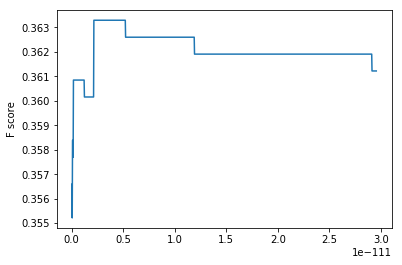

In [47]:
F_score, epsilons, best_eps = decide_epsilon(X_cv, y_cv, mu, sigma_2)
print('Optimal value of epsilon is',best_eps)
plt.plot(epsilons, F_score)
plt.ylabel('F score')
plt.show()

## F-score, Precision and Recall on Testing Dataset
So we have come to the conclustion that the best value of epsilon is 2.3852768966863267e-122.

Let's check the F_score for the test data set.

In [30]:
eps = best_eps
Y_probab_test = gaussian_probability(X_test, mu, sigma_2)
y_pred_test = get_Prediction(eps, Y_probab_test)
F_score_test, prec,rec = cal_F_score(y_test, y_pred_test)
print('F_score =',F_score_test)
print('Precision =',prec)
print('Recall =',rec)

F_score = 0.3629489603024575
Precision = 0.3392226148409894
Recall = 0.3902439024390244


So our algorithm detectes 289 frauds in the test dataset, which is close to (492/2)= 246 frauds in the test dataset.

## Checking Accuracy

In [0]:
from sklearn.metrics import accuracy_score

In [32]:
print(accuracy_score(y_test, y_pred_test))

0.9940990036596683


Hence the accuracy of our model is a 99.41%. Since this is an example of a skewed dataset, so accuarcy doesn't play a big role here.

What ***matters is high values of precision and recall***. Now since there is a trade off between precision and recall. Hence it is ***always better to get almost equal and high values for those***.

Our model has 
  - Precision = 33.92%
  - Recall = 39.02%